# Kaggle-dataset-analysis
## crime in Boston
# 2019-02-16 start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original=pd.read_csv('./crime.csv',engine='python')

In [3]:
original['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [4]:
original['OCCURRED_ON_DATE']=pd.to_datetime(original['OCCURRED_ON_DATE'])

In [5]:
np.isnan(original.any())

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT               False
REPORTING_AREA         False
SHOOTING               False
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART               False
STREET                 False
Lat                    False
Long                   False
Location               False
dtype: bool

In [6]:
original['DISTRICT'].unique()

array(['E18', 'D14', 'B2', 'A1', 'A7', 'C11', nan, 'D4', 'E13', 'B3',
       'C6', 'A15', 'E5'], dtype=object)

## top5 OFFENSE_CODE_GROUP 

In [7]:
offense=pd.pivot_table(original.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP', \
              columns='YEAR',aggfunc=np.count_nonzero)

In [8]:
summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'total'})

In [9]:
sumsort=summary.sort_values(by='total',ascending=False)
top5=sumsort.iloc[0:5,:]
top5

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,38134.0
Larceny,26670.0
Medical Assistance,24226.0
Investigate Person,19176.0
Other,18612.0


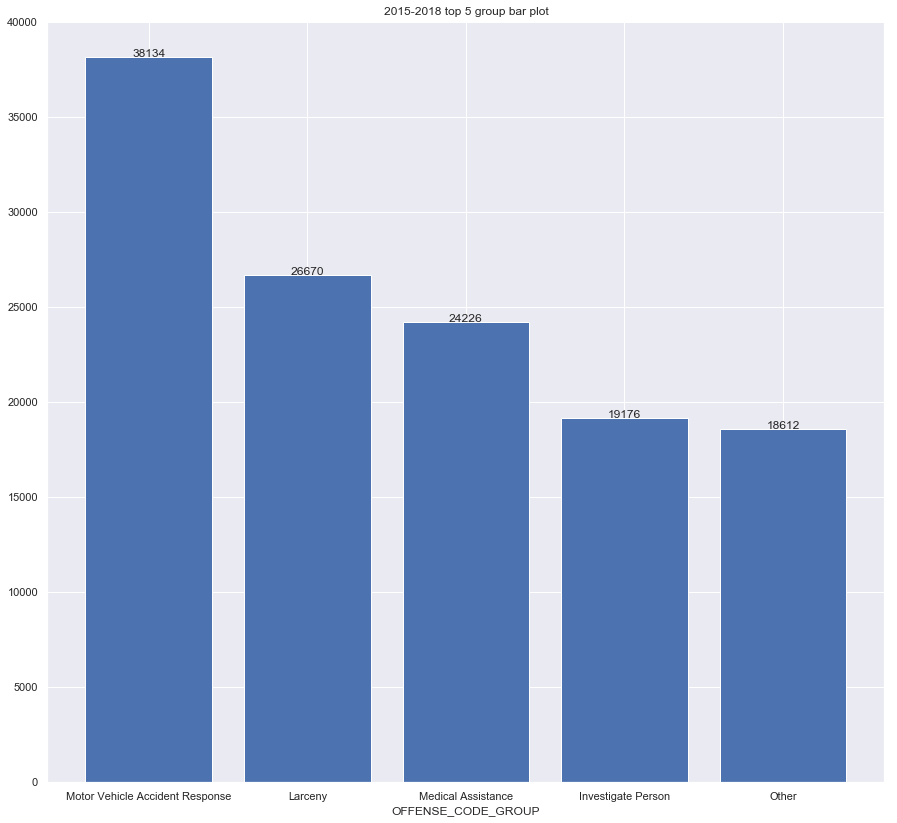

In [10]:
sns.set()
p0=plt.figure(figsize=(15,14))
plt.title(r'2015-2018 top 5 group bar plot')
plt.bar(range(top5.index.shape[0]),top5.loc[:,'total'])
plt.xlabel('OFFENSE_CODE_GROUP')
plt.xticks(range(top5.index.shape[0]),top5.index)
x=np.arange(top5.index.shape[0])
y=np.array(top5['total'])
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
p0.savefig('./top5_group_bar.png')
plt.show()

## Visualization-by DISTRICT

In [11]:
disgroup=original.groupby(by='DISTRICT')

In [12]:
groupcount=disgroup.count()

In [13]:
groupcount.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
DISTRICT,,,,,,,,,,,,,,,,
A1,36735,36735,36735,36735,36735,12,36735,36735,36735,36735,36735,36733,35186,32947,32947,36735
A15,6663,6663,6663,6663,6663,5,6663,6663,6663,6663,6663,6663,6486,6321,6321,6663
A7,13634,13634,13634,13634,13634,17,13634,13634,13634,13634,13634,13631,13328,13094,13094,13634
B2,51288,51288,51288,51288,51288,352,51288,51288,51288,51288,51288,51272,49445,47488,47488,51288
B3,36400,36400,36400,36400,36400,227,36400,36400,36400,36400,36400,36386,35641,34614,34614,36400


In [14]:
number=groupcount.iloc[:,0]
number=pd.DataFrame(number)

In [15]:
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
number.head()

,NUMBER
DISTRICT,
A1,36735
A15,6663
A7,13634
B2,51288
B3,36400


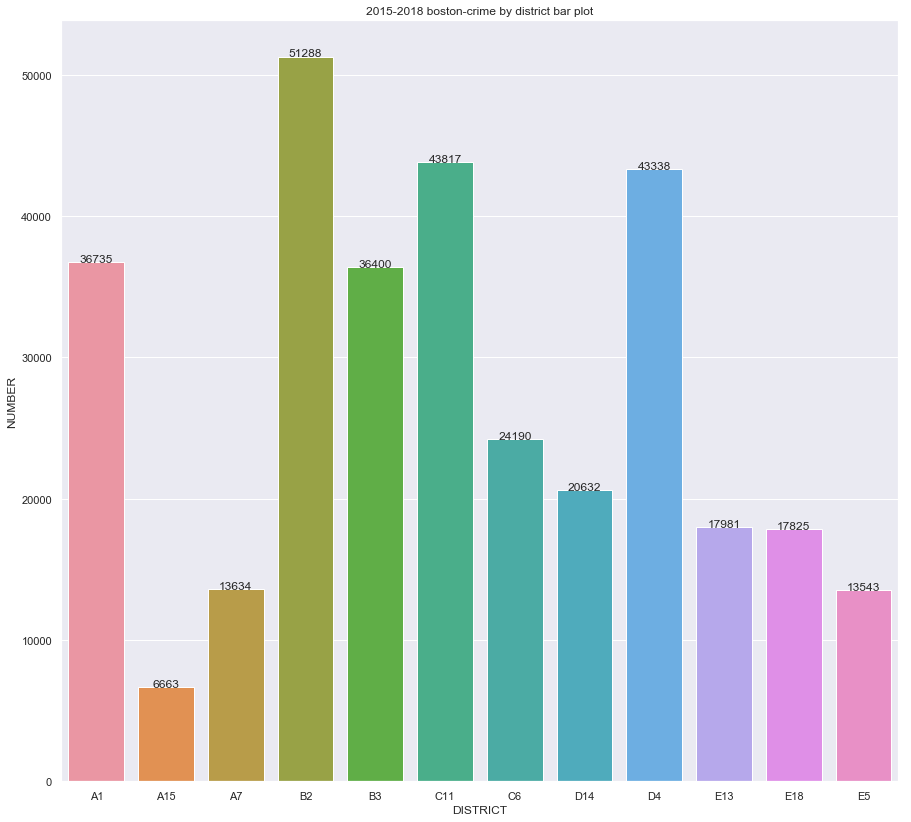

In [16]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 boston-crime by district bar plot')
p1=sns.barplot(x=number.index,y='NUMBER',data=number)
x=np.arange(number.index.shape[0])
y=np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p1fig=p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

## DISTRICT

B2 district has highest number of crime

C11 and D4 are higher than other district

A15 is least

follow this,from number dataframe take top5 district

In [17]:
districtsorted=number.sort_values(by='NUMBER',ascending=False)

In [18]:
top5=districtsorted.iloc[0:5,:]

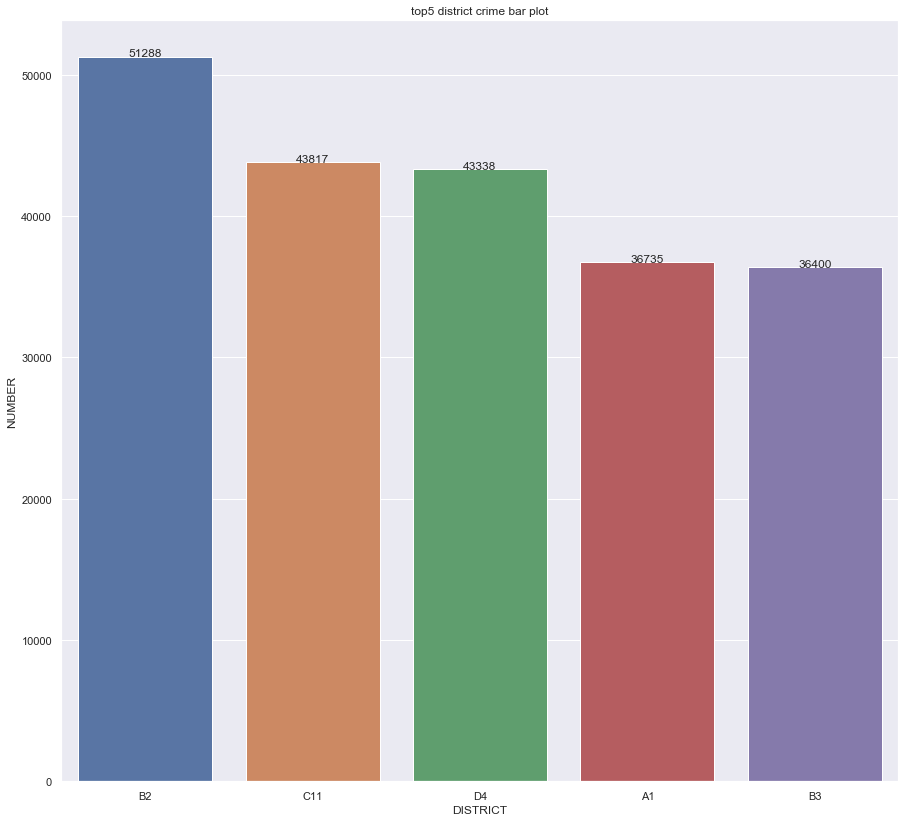

In [19]:
plt.figure(figsize=(15,14))
plt.title(r'top5 district crime bar plot')
p2=sns.barplot(x=top5.index,y='NUMBER',data=top5)
x=np.arange(top5.index.shape[0])
y=np.array(list(top5['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p2fig=p2.get_figure()
p2fig.savefig('./top5_district_crime_bar.png')
plt.show()

## Visualization-by YEAR

In [20]:
yeargroup=original.groupby(by='YEAR')

In [21]:
count=yeargroup.count()

In [22]:
yearnumber=pd.DataFrame(count.iloc[:,0])

In [23]:
yearnumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)

In [24]:
yearnumber

,NUMBER
YEAR,
2015,53392
2016,99134
2017,100938
2018,74356


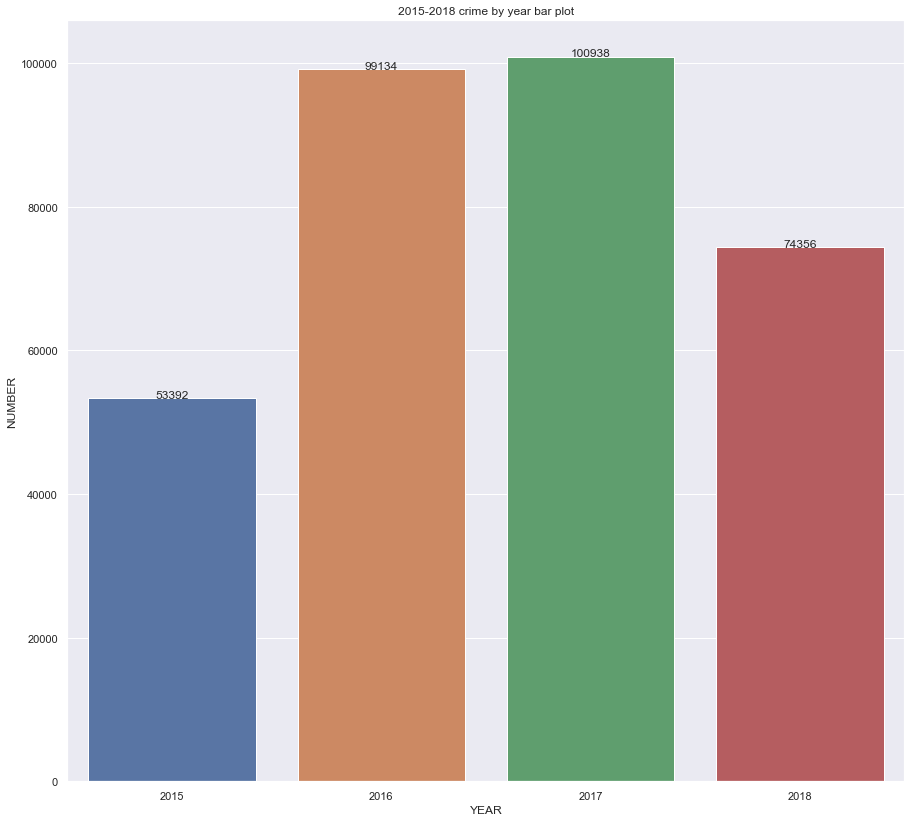

In [25]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 crime by year bar plot')
p3=sns.barplot(x=yearnumber.index,y='NUMBER',data=yearnumber)
x=np.arange(yearnumber.index.shape[0])
y=np.array(list(yearnumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
else:
    pass
p3fig=p3.get_figure()
p3fig.savefig('./total_by_year_bar.png')
plt.show()

## by year

With this bar chart,we can see 2017's crime number is highest

And 2015 is lowest,this may be caused by people get more depressive by year.

As news,we can see more and more crime has happened

This may cause this chart that appears higher trend.

## Shooting crime summary and Visualization

In [26]:
original['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [27]:
original.shape

(327820, 17)

In [28]:
original['SHOOTING']=original['SHOOTING'].fillna('N')

In [29]:
original['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [30]:
original.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [31]:
shootcrime=pd.pivot_table(original.loc[original['SHOOTING']=='Y',['YEAR','DISTRICT','SHOOTING']], \
               index='YEAR',columns='DISTRICT',aggfunc=np.count_nonzero)

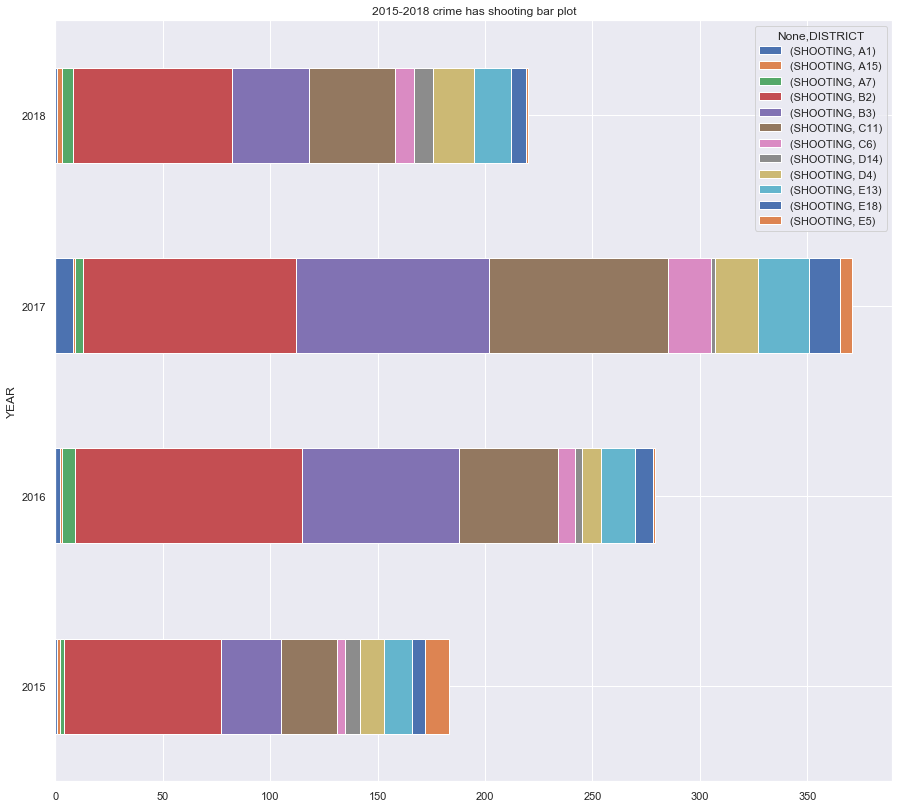

In [32]:
sns.set()
p4=shootcrime.plot(title=r'2015-2018 crime has shooting bar plot',figsize=(15,14),kind='barh',stacked=True)

p4fig=p4.get_figure()
p4fig.savefig('./total_shooting_crime_barh.png')
plt.show()

In [33]:
districtSum=shootcrime.apply(np.sum)
districtSum=pd.DataFrame(districtSum)

In [34]:
districtSum=districtSum.rename(columns={0:r'shooting total'})


In [35]:
districtSum=districtSum.sort_values(by=r'shooting total',ascending=False)

In [36]:
top5=districtSum.iloc[0:5,:]
top5

shooting total
         DISTRICT                
SHOOTING B2                   352
         B3                   227
         C11                  195
         E13                   70
         D4                    59

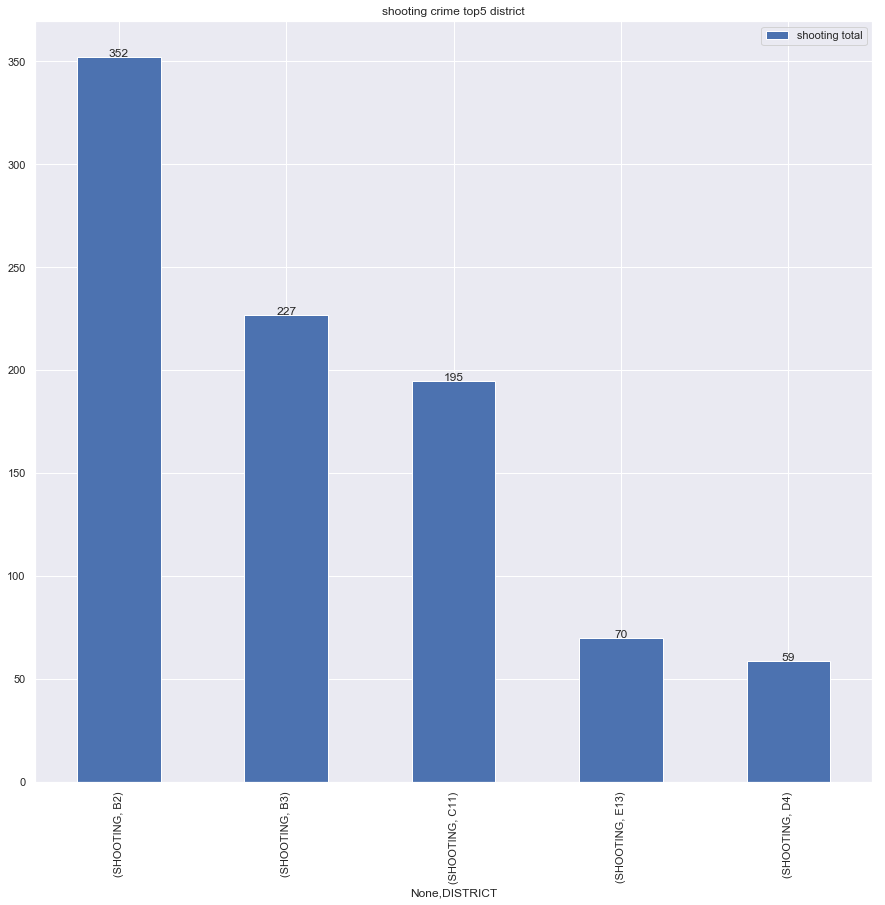

In [37]:
sns.set()
p5=top5.plot(title=r'shooting crime top5 district',figsize=(15,14),kind='bar')
x=np.arange(top5.index.shape[0])
y=np.array(list(top5[r'shooting total']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
p5fig=p5.get_figure()
p5fig.savefig('./shooting_crime_top5_bar.png')
plt.show()

## shooting crime

As this chart,B2 is the highest

and B2's crime number is the highest

We may need to be alert with this distrcit

B3'crime is fifth,but shooting crime is second

With two charts,the more crime happened,the more shooting crime happened.

## Visualization-by Month

In [38]:
byMonth=original.groupby(by='MONTH')

In [39]:
Monthcount=byMonth.count()

In [40]:
MonthNumber=pd.DataFrame(Monthcount.iloc[:,0])
MonthNumber.head()

,INCIDENT_NUMBER
MONTH,
1,23625
2,21661
3,24156
4,24108
5,26242


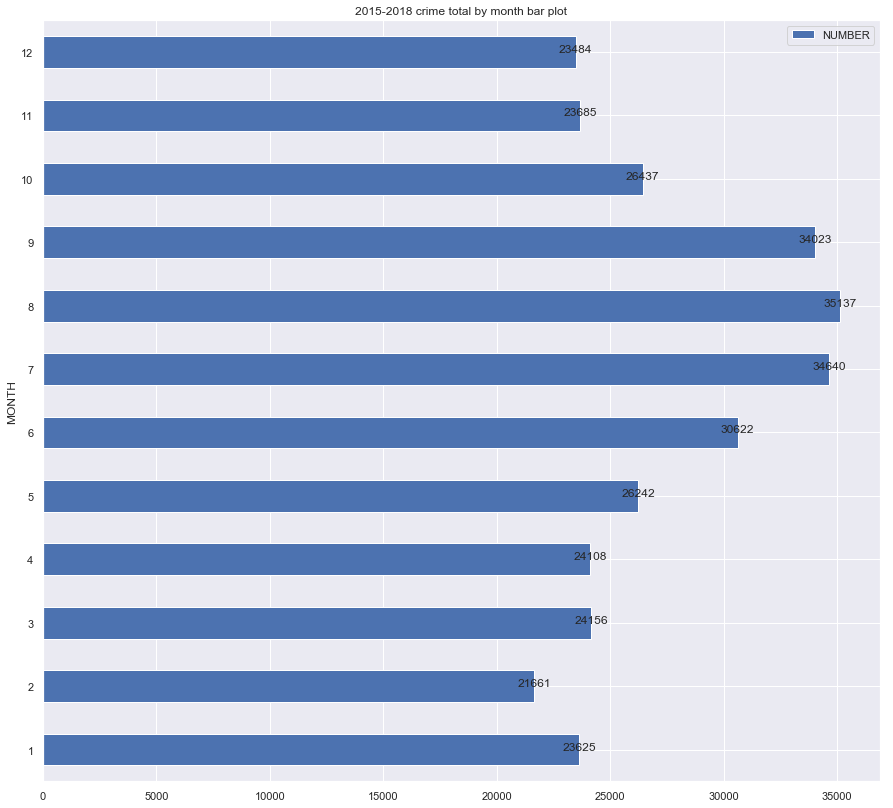

In [41]:
MonthNumber=MonthNumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'})
sns.set()
p6=MonthNumber.plot(title=r'2015-2018 crime total by month bar plot',figsize=(15,14),kind='barh')
x=np.arange(MonthNumber.index.shape[0])
y=np.array(list(MonthNumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(j,i,'%d'%j,ha='center')
p6fig=p6.get_figure()
p6fig.savefig('./total_by_month_bar.png')
plt.show()

## by Month

With this chart,July~August more crime happened

December~Febuary is less

Should draw a boxplot to see

In [42]:
Month=pd.pivot_table(original.loc[:,['YEAR','MONTH','INCIDENT_NUMBER']], \
               index='YEAR',columns='MONTH',aggfunc=np.count_nonzero)
Month

INCIDENT_NUMBER                                                          \
MONTH              1       2       3       4       5       6       7       8    
YEAR                                                                            
2015              NaN     NaN     NaN     NaN     NaN  4191.0  8326.0  8343.0   
2016           7837.0  7310.0  8199.0  8101.0  8582.0  8558.0  8620.0  8940.0   
2017           7993.0  7408.0  8179.0  8072.0  8721.0  8990.0  9077.0  9209.0   
2018           7795.0  6943.0  7778.0  7935.0  8939.0  8883.0  8617.0  8645.0   

                                       
MONTH      9       10      11      12  
YEAR                                   
2015   8415.0  8308.0  7818.0  7991.0  
2016   8526.0  8586.0  7924.0  7951.0  
2017   8950.0  8854.0  7943.0  7542.0  
2018   8132.0   689.0     NaN     NaN

In [43]:
Month=Month.fillna(0)

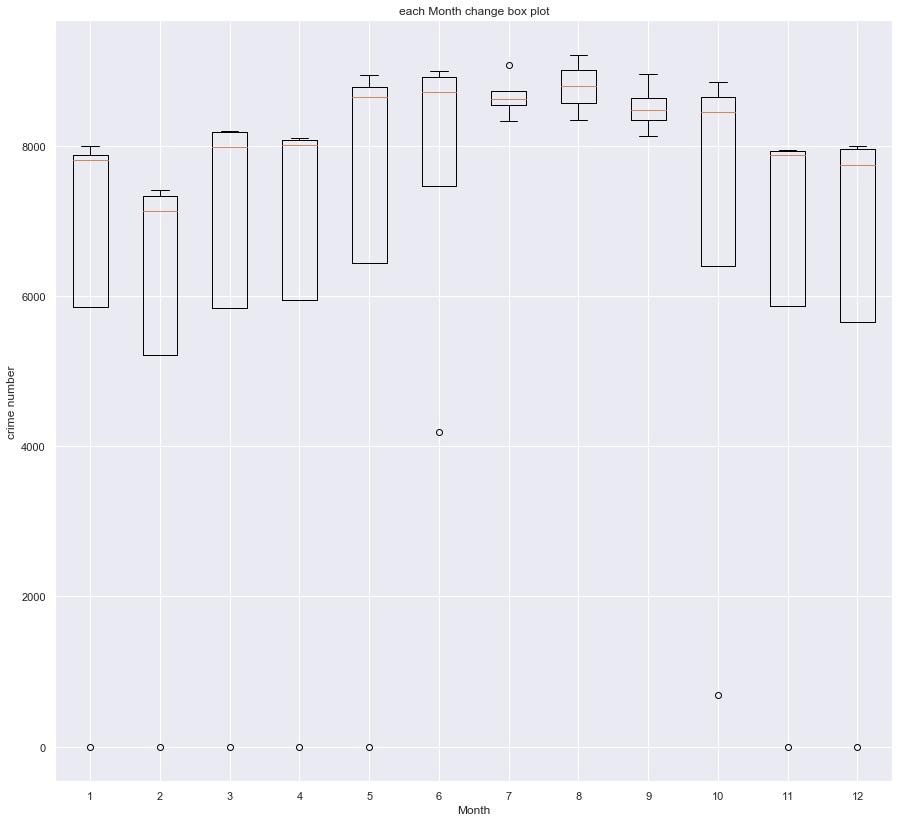

In [44]:
Monthlist=(list(Month.iloc[:,0])),(list(Month.iloc[:,1])),(list(Month.iloc[:,2])), \
(list(Month.iloc[:,3])),(list(Month.iloc[:,4])),(list(Month.iloc[:,5])),(list(Month.iloc[:,6])), \
(list(Month.iloc[:,7])),(list(Month.iloc[:,8])),(list(Month.iloc[:,9])),(list(Month.iloc[:,10])), \
(list(Month.iloc[:,11]))
def takesecond(elem):
    x=[]
    for i in elem:
        x.append(i[1])
    else:
        return x
label=takesecond(Month.columns)
sns.set()
p1=plt.figure(figsize=(15,14))
plt.boxplot(Monthlist,labels=label,meanline=True)
plt.title(r'each Month change box plot')
plt.xlabel('Month')
plt.ylabel(r'crime number')
p1.savefig('./by_month_boxplot.png')
plt.show()

## boxplot-Month

2015 January~May and 2018 November~December values are NaN,which is No record

2018 October is less,which is seen as abnormal value
This may be caused by No completed recording

July~Auguest has less change

With month bar chart,they may be crime's higher occurred months

And July in 2017 has high value,which is seen as abnormal value

Other Month have gentle change 

## Principal component analysis

find the most relative features

using PCA model to analysis

In [45]:
from sklearn.preprocessing import LabelEncoder
tras=original.iloc[:,:]
tras.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_CODE_GROUP'])
tras.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_DESCRIPTION'])
tras.loc[:,'DISTRICT']=LabelEncoder().fit_transform(tras.loc[:,'DISTRICT'].astype('str'))
tras.loc[:,'SHOOTING']=LabelEncoder().fit_transform(tras.loc[:,'SHOOTING'].astype('str'))
tras.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(tras.loc[:,'DAY_OF_WEEK'])
tras.loc[:,'UCR_PART']=LabelEncoder().fit_transform(tras.loc[:,'UCR_PART'].astype('str'))
tras.loc[:,'STREET']=LabelEncoder().fit_transform(tras.loc[:,'STREET'].astype('str'))

In [46]:
tras.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,14,62,10,495,0,2018-10-03 20:13:00,2018,10,6,20,3,240,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,52,186,7,795,0,2018-08-30 20:00:00,2018,8,4,20,2,143,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,46,221,3,329,0,2018-10-03 19:20:00,2018,10,6,19,3,1273,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,0,16,0,92,0,2018-10-03 20:00:00,2018,10,6,20,1,728,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,1,4,2,36,0,2018-10-03 20:49:00,2018,10,6,20,2,3408,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [47]:
tras.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(tras.loc[:,'REPORTING_AREA'])

In [48]:
data=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=tras.loc[:,'MONTH']

In [49]:
from sklearn.decomposition import PCA
pcamodel=PCA(n_components=11).fit(data)

In [50]:
print(pcamodel.explained_variance_ratio_)
'''
top2
OFFENSE_CODE
OFFENSE_CODE_GROUP
'''

[5.91420598e-01 3.89405264e-01 1.81125137e-02 9.92571142e-04
 5.39400301e-05 1.09663313e-05 2.59277550e-06 1.14421814e-06
 2.81928127e-07 1.27758734e-07 8.81706940e-10]


'\ntop2\nOFFENSE_CODE\nOFFENSE_CODE_GROUP\n'

## PCA

With using PCA model,OFFENSE_CODE and OFFENSE_CODE_GROUP are main

### 2019-02-20

Use pearson coeffient to analysis correlation

to choose features to predict

## correlation analysis-pearson coefficient

In [51]:
pdata=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
pearsonMatrix=pd.DataFrame(round(pdata.corr(method='pearson'),6))
pearsonMatrix.sort_values(by='MONTH',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
MONTH,-0.013767,-0.005614,-0.009981,-0.002079,-0.000646,0.007760,-0.343858,0.004284,0.001991,-0.020370,-0.003781,1.000000
SHOOTING,-0.058043,-0.076569,-0.051014,-0.007122,0.005571,1.000000,-0.000299,-0.003644,0.004458,-0.045012,0.000690,0.007760
DAY_OF_WEEK,-0.002096,-0.001146,0.004687,0.004401,-0.005244,-0.003644,0.000767,1.000000,0.008342,0.005716,0.000685,0.004284
HOUR,-0.017109,-0.022071,-0.016076,0.014511,0.006267,0.004458,0.001224,0.008342,1.000000,-0.008225,-0.003634,0.001991
REPORTING_AREA,0.015461,0.011612,0.002161,0.189593,1.000000,0.005571,-0.009076,-0.005244,0.006267,-0.001309,-0.075143,-0.000646
DISTRICT,0.015447,-0.002160,0.003713,1.000000,0.189593,-0.007122,0.009041,0.004401,0.014511,-0.016115,-0.009226,-0.002079
STREET,0.002873,-0.005105,-0.003713,-0.009226,-0.075143,0.000690,-0.011853,0.000685,-0.003634,0.011110,1.000000,-0.003781
OFFENSE_CODE_GROUP,0.251910,1.000000,0.563958,-0.002160,0.011612,-0.076569,0.012072,-0.001146,-0.022071,0.191804,-0.005105,-0.005614
OFFENSE_DESCRIPTION,0.458922,0.563958,1.000000,0.003713,0.002161,-0.051014,0.017729,0.004687,-0.016076,0.076092,-0.003713,-0.009981
OFFENSE_CODE,1.000000,0.251910,0.458922,0.015447,0.015461,-0.058043,0.043738,-0.002096,-0.017109,0.226169,0.002873,-0.013767


## pearson coefficient matrix

With using pearson coefficient matrix,

SHOOTING,DAT_OF_WEEK and HOUR are more relative to predict Month

try to use three features to predict

## predict Month-using GBC

using GradientBoostingClassifier

In [52]:
sample=tras.sample(n=10000)

In [53]:
features=sample.loc[:,['SHOOTING','DAY_OF_WEEK','HOUR']]
target=sample.loc[:,'MONTH']

In [54]:
from sklearn.model_selection import train_test_split
dataTrain,dataTest, \
targetTrain,targetTest= \
train_test_split(features,target,train_size=0.8)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [56]:
crimeGBC=GBC(max_depth=12)

In [57]:
crimeGBC.fit(dataTrain,targetTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
pred=crimeGBC.predict(dataTrain)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(targetTrain,pred))

              precision    recall  f1-score   support

           1       0.15      0.14      0.15       618
           2       0.17      0.07      0.09       531
           3       0.16      0.06      0.09       601
           4       0.17      0.09      0.12       622
           5       0.17      0.12      0.14       627
           6       0.16      0.16      0.16       704
           7       0.16      0.21      0.18       811
           8       0.18      0.31      0.23       882
           9       0.16      0.33      0.21       853
          10       0.17      0.12      0.14       642
          11       0.19      0.07      0.10       522
          12       0.17      0.13      0.15       587

   micro avg       0.17      0.17      0.17      8000
   macro avg       0.17      0.15      0.15      8000
weighted avg       0.17      0.17      0.15      8000



In [60]:
predict=crimeGBC.predict(dataTest)

In [61]:
print(classification_report(targetTest,predict))

              precision    recall  f1-score   support

           1       0.05      0.07      0.06       107
           2       0.05      0.02      0.03       136
           3       0.15      0.06      0.08       157
           4       0.08      0.05      0.06       151
           5       0.10      0.07      0.08       176
           6       0.07      0.07      0.07       187
           7       0.12      0.15      0.13       218
           8       0.09      0.15      0.12       220
           9       0.14      0.29      0.18       216
          10       0.03      0.03      0.03       142
          11       0.11      0.03      0.05       151
          12       0.12      0.10      0.11       139

   micro avg       0.10      0.10      0.10      2000
   macro avg       0.09      0.09      0.08      2000
weighted avg       0.10      0.10      0.09      2000



In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(targetTest,predict))

0.101


## predict Month-using GBC and PCA

In [63]:
pcadata=sample.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=sample.loc[:,'MONTH']


In [64]:
Pcatras=PCA(n_components=2).fit_transform(pcadata)

In [65]:
pcaTrain,pcaTest, \
ptargetTrain,ptargetTest = \
train_test_split(Pcatras,target,train_size=0.8)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [66]:
pcaGBC=GBC(max_depth=12).fit(pcaTrain,ptargetTrain)

In [67]:
pcapre=pcaGBC.predict(pcaTrain)
print(classification_report(ptargetTrain,pcapre))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       581
           2       0.99      0.99      0.99       533
           3       0.99      0.99      0.99       611
           4       0.99      0.99      0.99       615
           5       0.99      0.99      0.99       654
           6       0.99      0.99      0.99       700
           7       0.99      0.99      0.99       795
           8       0.99      0.99      0.99       891
           9       0.98      0.99      0.99       869
          10       0.99      0.98      0.99       640
          11       0.99      0.99      0.99       537
          12       1.00      0.99      0.99       574

   micro avg       0.99      0.99      0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [68]:
pcapredict=pcaGBC.predict(pcaTest)
print(classification_report(ptargetTest,pcapredict))
print(accuracy_score(ptargetTest,pcapredict))

              precision    recall  f1-score   support

           1       0.06      0.06      0.06       144
           2       0.11      0.09      0.10       134
           3       0.08      0.07      0.07       147
           4       0.12      0.12      0.12       158
           5       0.08      0.09      0.08       149
           6       0.08      0.07      0.07       191
           7       0.13      0.12      0.13       234
           8       0.09      0.12      0.11       211
           9       0.09      0.10      0.10       200
          10       0.08      0.08      0.08       144
          11       0.03      0.03      0.03       136
          12       0.09      0.09      0.09       152

   micro avg       0.09      0.09      0.09      2000
   macro avg       0.09      0.09      0.09      2000
weighted avg       0.09      0.09      0.09      2000

0.0895


## predict Month-using SVC and three features

In [69]:
from sklearn.svm import SVC
crimeSVC=SVC()

In [70]:
crimeSVC.fit(dataTrain,targetTrain)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
SVCpre=crimeSVC.predict(dataTrain)
print(classification_report(targetTrain,SVCpre))

              precision    recall  f1-score   support

           1       0.15      0.07      0.10       618
           2       0.16      0.02      0.04       531
           3       0.00      0.00      0.00       601
           4       0.16      0.01      0.03       622
           5       0.16      0.07      0.10       627
           6       0.15      0.04      0.07       704
           7       0.13      0.31      0.18       811
           8       0.14      0.44      0.21       882
           9       0.14      0.32      0.19       853
          10       0.13      0.06      0.08       642
          11       0.00      0.00      0.00       522
          12       0.00      0.00      0.00       587

   micro avg       0.14      0.14      0.14      8000
   macro avg       0.11      0.11      0.08      8000
weighted avg       0.11      0.14      0.09      8000



c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
SVCpredict=crimeSVC.predict(dataTest)
print(classification_report(targetTest,SVCpredict))
print(accuracy_score(targetTest,SVCpredict))

              precision    recall  f1-score   support

           1       0.03      0.02      0.02       107
           2       0.16      0.02      0.04       136
           3       0.00      0.00      0.00       157
           4       0.06      0.01      0.01       151
           5       0.09      0.04      0.06       176
           6       0.09      0.03      0.04       187
           7       0.10      0.23      0.14       218
           8       0.11      0.34      0.16       220
           9       0.12      0.28      0.17       216
          10       0.03      0.01      0.02       142
          11       0.00      0.00      0.00       151
          12       0.00      0.00      0.00       139

   micro avg       0.10      0.10      0.10      2000
   macro avg       0.07      0.08      0.05      2000
weighted avg       0.07      0.10      0.07      2000

0.1025


c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## predict Month-using SVC and PCA

In [73]:
pSVC=SVC().fit(pcaTrain,ptargetTrain)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
pcaSVCpre=pSVC.predict(pcaTrain)
print(classification_report(ptargetTrain,pcaSVCpre))

              precision    recall  f1-score   support

           1       0.92      0.77      0.83       581
           2       0.93      0.70      0.80       533
           3       0.85      0.76      0.80       611
           4       0.86      0.78      0.82       615
           5       0.86      0.85      0.86       654
           6       0.78      0.86      0.82       700
           7       0.78      0.89      0.83       795
           8       0.72      0.94      0.81       891
           9       0.74      0.91      0.82       869
          10       0.87      0.79      0.83       640
          11       0.93      0.70      0.80       537
          12       0.94      0.75      0.84       574

   micro avg       0.82      0.82      0.82      8000
   macro avg       0.85      0.81      0.82      8000
weighted avg       0.84      0.82      0.82      8000



In [75]:
pcaSVCpredict=pSVC.predict(pcaTest)
print(classification_report(ptargetTest,pcaSVCpredict))
print(accuracy_score(ptargetTest,pcaSVCpredict))

              precision    recall  f1-score   support

           1       0.13      0.05      0.07       144
           2       0.12      0.03      0.05       134
           3       0.10      0.04      0.06       147
           4       0.08      0.03      0.05       158
           5       0.06      0.03      0.04       149
           6       0.06      0.02      0.03       191
           7       0.18      0.07      0.10       234
           8       0.11      0.69      0.19       211
           9       0.12      0.08      0.09       200
          10       0.04      0.01      0.02       144
          11       0.10      0.03      0.05       136
          12       0.09      0.02      0.03       152

   micro avg       0.11      0.11      0.11      2000
   macro avg       0.10      0.09      0.06      2000
weighted avg       0.10      0.11      0.07      2000

0.1085


## predict Month-using RandomForestClassifier and PCA

In [76]:
from sklearn.ensemble import RandomForestClassifier as RFC
crimeRFC=RFC(max_depth=12)

In [77]:
crimeRFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
crimeRFC.fit(pcaTrain,ptargetTrain)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
RFCpre=crimeRFC.predict(pcaTrain)
print(classification_report(ptargetTrain,RFCpre))

              precision    recall  f1-score   support

           1       0.50      0.28      0.36       581
           2       0.65      0.22      0.33       533
           3       0.53      0.28      0.36       611
           4       0.53      0.27      0.36       615
           5       0.54      0.32      0.40       654
           6       0.50      0.29      0.37       700
           7       0.43      0.38      0.40       795
           8       0.23      0.63      0.34       891
           9       0.24      0.57      0.34       869
          10       0.52      0.31      0.38       640
          11       0.56      0.28      0.37       537
          12       0.63      0.28      0.38       574

   micro avg       0.36      0.36      0.36      8000
   macro avg       0.49      0.34      0.37      8000
weighted avg       0.47      0.36      0.37      8000



In [80]:
RFCpredict=crimeRFC.predict(pcaTest)
print(classification_report(ptargetTest,RFCpredict))
print(accuracy_score(ptargetTest,RFCpredict))

              precision    recall  f1-score   support

           1       0.09      0.05      0.06       144
           2       0.08      0.03      0.04       134
           3       0.06      0.03      0.04       147
           4       0.08      0.04      0.06       158
           5       0.12      0.09      0.10       149
           6       0.08      0.04      0.05       191
           7       0.10      0.07      0.08       234
           8       0.10      0.31      0.16       211
           9       0.10      0.22      0.13       200
          10       0.09      0.08      0.08       144
          11       0.04      0.01      0.02       136
          12       0.10      0.05      0.07       152

   micro avg       0.10      0.10      0.10      2000
   macro avg       0.09      0.09      0.07      2000
weighted avg       0.09      0.10      0.08      2000

0.095


With using PCA and three features,

use PCA data seems to be more effective than choose three features,

and use SVC model get highest accuracy score



## predict-offense_code_group 

### choose features with pearson matrix

In [82]:
pearsonMatrix.sort_values(by='OFFENSE_CODE_GROUP',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
OFFENSE_CODE_GROUP,0.251910,1.000000,0.563958,-0.002160,0.011612,-0.076569,0.012072,-0.001146,-0.022071,0.191804,-0.005105,-0.005614
OFFENSE_DESCRIPTION,0.458922,0.563958,1.000000,0.003713,0.002161,-0.051014,0.017729,0.004687,-0.016076,0.076092,-0.003713,-0.009981
OFFENSE_CODE,1.000000,0.251910,0.458922,0.015447,0.015461,-0.058043,0.043738,-0.002096,-0.017109,0.226169,0.002873,-0.013767
UCR_PART,0.226169,0.191804,0.076092,-0.016115,-0.001309,-0.045012,0.004241,0.005716,-0.008225,1.000000,0.011110,-0.020370
YEAR,0.043738,0.012072,0.017729,0.009041,-0.009076,-0.000299,1.000000,0.000767,0.001224,0.004241,-0.011853,-0.343858
REPORTING_AREA,0.015461,0.011612,0.002161,0.189593,1.000000,0.005571,-0.009076,-0.005244,0.006267,-0.001309,-0.075143,-0.000646
DAY_OF_WEEK,-0.002096,-0.001146,0.004687,0.004401,-0.005244,-0.003644,0.000767,1.000000,0.008342,0.005716,0.000685,0.004284
DISTRICT,0.015447,-0.002160,0.003713,1.000000,0.189593,-0.007122,0.009041,0.004401,0.014511,-0.016115,-0.009226,-0.002079
STREET,0.002873,-0.005105,-0.003713,-0.009226,-0.075143,0.000690,-0.011853,0.000685,-0.003634,0.011110,1.000000,-0.003781
MONTH,-0.013767,-0.005614,-0.009981,-0.002079,-0.000646,0.007760,-0.343858,0.004284,0.001991,-0.020370,-0.003781,1.000000


In [93]:
offenseSample=tras.sample(n=10000)
odata=offenseSample.loc[:,['UCR_PART','YEAR','REPORTING_AREA']]
otarget=offenseSample.loc[:,'OFFENSE_CODE_GROUP']

In [94]:
odata.head()

,UCR_PART,YEAR,REPORTING_AREA
217244,2,2016,643
169498,3,2017,194
40128,2,2018,0
294533,3,2015,41
191586,2,2016,0


In [95]:
odata['YEAR']=LabelEncoder().fit_transform(odata['YEAR'])

In [96]:
otarget.unique()

array([40, 15, 43, 46, 31, 44, 34,  0, 49, 63, 42, 65, 51,  4, 37, 52, 32,
       58, 56, 22, 11, 41, 35, 64, 21, 61,  3, 66, 45, 62, 38, 27, 12, 19,
       17, 33, 59, 20, 13, 14, 55, 36, 16,  6, 54, 53, 10,  5,  2, 29, 47,
       48, 57, 28, 24, 60, 39, 50, 18,  8], dtype=int64)

## predict offense_code_group-with three features and SVC

In [99]:
odataTrain,odataTest, \
otargetTrain,otargetTest = \
train_test_split(odata,otarget,train_size=0.8)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [100]:
offenseSVC=SVC()

In [101]:
offenseSVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [102]:
offenseSVC.fit(odataTrain,otargetTrain)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [103]:
offensepred=offenseSVC.predict(odataTrain)

In [106]:
print(classification_report(otargetTrain,offensepred))
print(accuracy_score(otargetTrain,offensepred))

              precision    recall  f1-score   support

           0       0.49      0.38      0.42       192
           2       0.00      0.00      0.00         6
           3       0.62      0.29      0.39        28
           4       0.67      0.13      0.22       124
           5       1.00      0.14      0.24        22
           6       0.00      0.00      0.00        18
           8       0.00      0.00      0.00         2
          10       0.60      0.07      0.12        44
          11       0.75      0.07      0.12        89
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00         3
          14       0.43      0.04      0.07        79
          15       0.43      0.65      0.52       417
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         9
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00        46
          20       0.00    

In [107]:
offensepredict=offenseSVC.predict(odataTest)

In [108]:
print(classification_report(otargetTest,offensepredict))
print(accuracy_score(otargetTest,offensepredict))

              precision    recall  f1-score   support

           0       0.16      0.09      0.12        44
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        14
          15       0.32      0.47      0.38       101
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00        15
          20       0.00      0.00      0.00         4
          21       0.00    

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## predict offense_code_group-PCA and SVC

In [114]:
opdata=offenseSample.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
optarget=offenseSample.loc[:,'OFFENSE_CODE_GROUP']

In [115]:
opcamodel=PCA(n_components=12).fit(opdata)

In [116]:
opcamodel.explained_variance_ratio_

array([5.90705874e-01, 3.89848527e-01, 1.83814893e-02, 9.91928591e-04,
       5.40872332e-05, 1.10518653e-05, 2.94734744e-06, 2.57297958e-06,
       1.14508751e-06, 2.45640241e-07, 1.29029446e-07, 9.53654179e-10])

In [117]:
opcadata=PCA(n_components=2).fit_transform(opdata)

In [118]:
opcadata.shape

(10000, 2)

In [119]:
opcaDataTrain,opcaDataTest, \
opcaTargetTrain,opcaTargetTest = \
train_test_split(opcadata,optarget,train_size=0.8)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [120]:
pcaoffenseSVC=SVC().fit(opcaDataTrain,opcaTargetTrain)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [121]:
pcapre=pcaoffenseSVC.predict(opcaDataTrain)
print(classification_report(opcaTargetTrain,pcapre))
print(accuracy_score(opcaTargetTrain,pcapre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           2       1.00      1.00      1.00         5
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00        20
           6       1.00      0.95      0.98        21
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00       417
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         7
          18       1.00      1.00      1.00         2
          19       0.95      1.00      0.97        52
          20       1.00    

In [122]:
pcapredict=pcaoffenseSVC.predict(opcaDataTest)
print(classification_report(opcaTargetTest,pcapredict))
print(accuracy_score(opcaTargetTest,pcapredict))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45        48
           2       0.00      0.00      0.00         1
           3       1.00      0.40      0.57         5
           4       1.00      0.15      0.26        33
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1
          10       1.00      0.25      0.40        12
          11       1.00      0.12      0.22        24
          12       1.00      0.20      0.33        15
          13       0.00      0.00      0.00         2
          14       1.00      0.21      0.35        19
          15       1.00      0.41      0.58       101
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         9
          20       0.00      0.00      0.00         4
          21       0.00    

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## predict offense_code_group-using PCA and GBC

In [123]:
opcaGBC=GBC(max_depth=66).fit(opcaDataTrain,opcaTargetTrain)

In [125]:
opcaGBCpre=opcaGBC.predict(opcaDataTrain)
print(classification_report(opcaTargetTrain,opcaGBCpre))
print(accuracy_score(opcaTargetTrain,opcaGBCpre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        21
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00       417
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         7
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00        52
          20       1.00    

In [126]:
opcaGBCpredict=opcaGBC.predict(opcaDataTest)
print(classification_report(opcaTargetTest,opcaGBCpredict))
print(accuracy_score(opcaTargetTest,opcaGBCpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           2       1.00      1.00      1.00         1
           3       0.17      0.20      0.18         5
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00         8
           6       0.50      0.29      0.36         7
           8       0.00      0.00      0.00         1
          10       1.00      1.00      1.00        12
          11       0.74      0.58      0.65        24
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00       101
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         4
          19       0.50      0.67      0.57         9
          20       1.00      0.50      0.67         4
          21       0.89    

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## predict offense_code_group

With using PCA and GradientBoostingClassifier,

accuracy score is 89%,and some class's f1_score reach 1.00

So,best way may be using PCA and GradientBoostingClassifier